In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Números y Datos
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# Set seed for random generation
seed = 3569
np.random.seed(seed)

genre_config = {
    'jazz': 1,
    'classical' : 2,
    'drum-and-bass' : 3,
    'death-metal' : 4,
    'ambient' : 5,
    'ska' : 6,
    'singer-songwriter' : 7,
    'opera' : 8,
    'trance' : 9
}

In [2]:
df_spotify = pd.read_pickle('sources/df_todo_1_Uniform.pickle')

In [3]:
df_spotify.head(10)

,af_duration_ms,af_popularity,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,...,aa_t11_dif_iqr,aa_pitch_dif_mediana,aa_pitch_dif_iqr,aa_pitch_mediana,aa_pitch_iqr,aa_timbre_dif_mediana,aa_timbre_dif_iqr,aa_timbre_mediana,aa_timbre_iqr,genre
id,,,,,,,,,,,,,,,,,,,,,
4d3XHYFFuYYzxWr2cJ6yQl,0.766134,0.893939,0.565657,0.177227,0.479798,0.178859,1.0,0.599327,0.721872,0.738384,...,0.491252,0.473879,0.184635,0.023096,0.045687,0.868210,0.652999,0.344643,0.936381,jazz
3X3p3u03P8eFL8WTH0oaaU,0.755988,0.878788,0.809764,0.237374,0.641414,0.249220,1.0,0.429293,0.718272,0.549407,...,0.545455,0.268316,0.624165,0.065758,0.084597,0.478402,0.710647,0.419566,0.732306,jazz
4KlXeaheot0OI9PoOWspvZ,0.764649,0.494949,0.974414,0.320730,0.813131,0.481615,0.0,0.346801,0.581982,0.737374,...,0.055794,0.402962,0.474025,0.096340,0.476744,0.536099,0.839182,0.190657,0.983901,jazz
3j76McoUI18gDoqxYE14Bu,0.573493,0.626263,0.890152,0.474747,0.267677,0.247367,1.0,0.072727,0.629105,0.635152,...,0.892868,0.657293,0.603615,0.724723,0.783911,0.487373,0.939980,0.057123,0.791332,jazz
4zxd4tiXPlWMqoJltbVTbE,0.601671,0.939394,0.561428,0.176309,0.893939,0.362114,1.0,0.202020,0.760101,0.194707,...,0.504287,0.180000,0.236572,0.072014,0.102416,0.267625,0.598742,0.459125,0.980818,jazz
4LInRUJ6XN1TVnoRVAFcdB,0.535853,0.000000,0.834887,0.187879,0.166667,0.182354,1.0,0.419192,0.474242,0.275091,...,0.480688,0.056262,0.350254,0.334120,0.029316,0.792929,0.803821,0.476667,0.940807,jazz
16QhvfPMBLpo7sFqOqTff3,0.615139,0.565657,0.489268,0.212121,0.641414,0.401449,0.0,0.259259,0.797980,0.643973,...,0.037932,0.467657,0.225754,0.012399,0.023981,0.043887,0.578212,0.147646,0.637678,jazz
2kF9Ijd7I2Kk2P4bYqUmzG,0.439761,0.924242,0.867266,0.365560,0.479798,0.329075,0.0,0.375817,0.581982,0.192103,...,0.677175,0.392076,0.724058,0.151073,0.289077,0.219433,0.903448,0.127327,0.752354,jazz
7pKWTcPfT9mg2iAhobFHpS,0.449910,0.868687,0.700577,0.201178,0.267677,0.332008,0.0,0.628507,0.836364,0.820707,...,0.171223,0.471791,0.158749,0.015216,0.057797,0.090227,0.360094,0.259385,0.605324,jazz


In [4]:
genre_real = df_spotify['genre']
genre_numeric = [genre_config[item] for item in genre_real]

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df_spotify.select_dtypes(include=numerics)

In [6]:
def plot_conf_matrix(real, Z2, xlabels, description):
    mat = confusion_matrix(real, Z2)
    sns.heatmap(
        mat.T,
        square=True,
        annot=True,
        fmt='d',
        cbar=False,
        xticklabels=xlabels,
        yticklabels=range(9)
    )
    plt.xlabel('Real')
    plt.ylabel(description)
    plt.show()

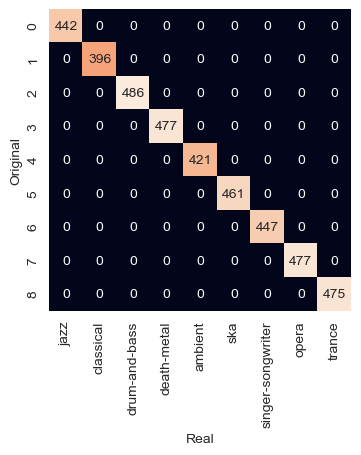

In [7]:
genres = genre_real.unique()

plot_conf_matrix(
    genre_real.values,
    genre_real.values,
    genres,
    'Original'
)

In [8]:
# Efecto Uniforme
clusters = df_spotify.genre.value_counts()
print(np.std(clusters)/np.mean(clusters))

0.06243141865809519


In [9]:
## Validación Interna
from sklearn.metrics.pairwise import euclidean_distances

df = df_spotify.drop(['genre'], axis=1)
d  = euclidean_distances(df, df)

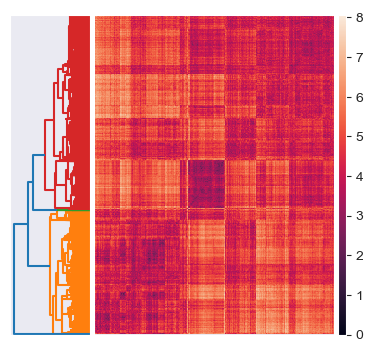

In [10]:
import pylab
from scipy.cluster.hierarchy import dendrogram, linkage

# Abrir figura nueva
fig = pylab.figure()

# Calcular dendrograma y graficar.
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = linkage(d, method='centroid')
Z = dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])
axdendro.invert_xaxis()

# Graficar la matriz de distancias.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
d = d[index,:]
d = d[:,index]
im = axmatrix.matshow(d, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Graficar la barra de color
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pylab.colorbar(im, cax=axcolor)

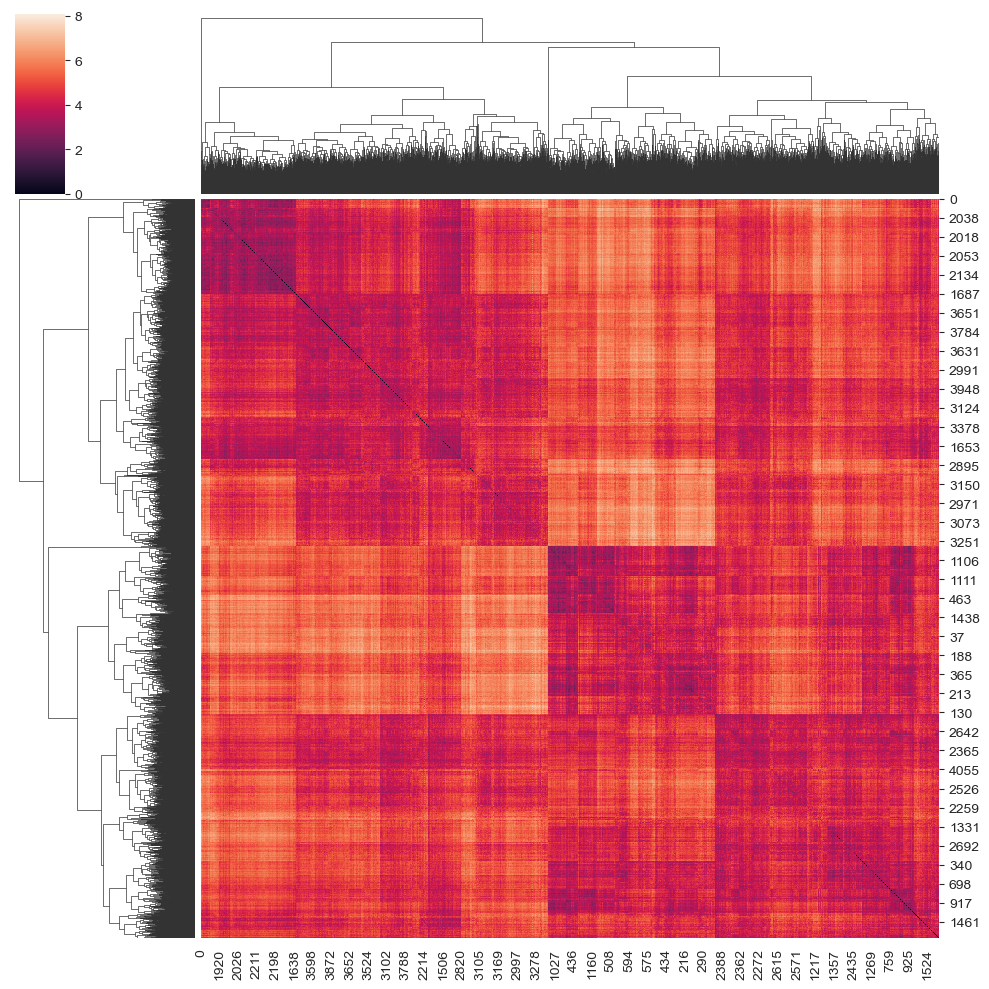

In [11]:
sns.clustermap(d)

In [12]:
from sklearn.metrics import  silhouette_score

## Silhuette usando sklearn
silhouette_avg = silhouette_score(df, df_spotify.genre)
silhouette_avg

0.03925343773823076

In [13]:
from sklearn.metrics import  silhouette_samples

## Silhuette usando sklearn
sample_silhouette_values = silhouette_samples(df, df_spotify.genre)
sample_silhouette_values

array([ 0.0197228 ,  0.07410347,  0.03670202, ...,  0.02969605,
       -0.02622491,  0.01534737])

In [14]:
# Estimar el coeficiente de Silhouette para cada cluster
cluster_labels = df_spotify.genre
clusters = np.unique(cluster_labels)
ith_cluster_silhouette_avg = []
for cluster in clusters:
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster]
    ith_cluster_silhouette_avg.append(
        {
            "cluster": cluster,
            "silhouette_avg": np.mean(ith_cluster_silhouette_values)
        }
    )
ith_cluster_silhouette_avg

[{'cluster': 'ambient', 'silhouette_avg': -0.06527357892609625},
 {'cluster': 'classical', 'silhouette_avg': 0.03219169740552933},
 {'cluster': 'death-metal', 'silhouette_avg': 0.2290446080725555},
 {'cluster': 'drum-and-bass', 'silhouette_avg': -0.0027161359076494497},
 {'cluster': 'jazz', 'silhouette_avg': 0.007146780504284541},
 {'cluster': 'opera', 'silhouette_avg': 0.09136576886141563},
 {'cluster': 'singer-songwriter', 'silhouette_avg': 0.004006512644167219},
 {'cluster': 'ska', 'silhouette_avg': 0.030181054568131242},
 {'cluster': 'trance', 'silhouette_avg': 0.010525835045330481}]

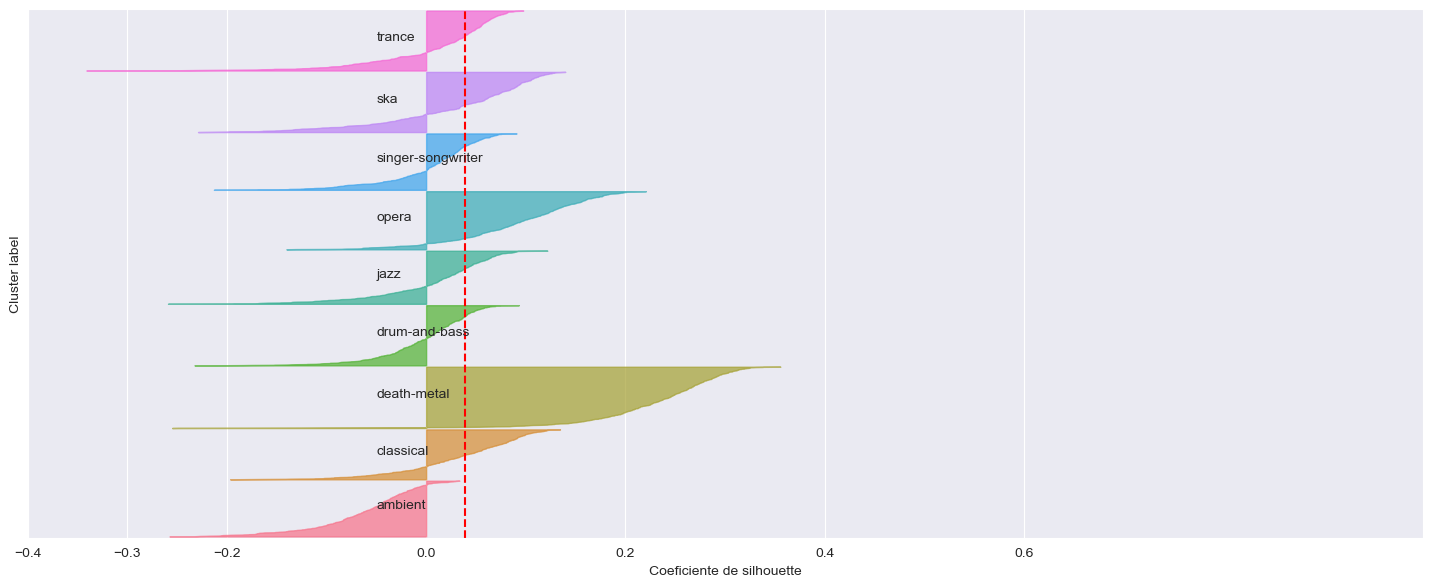

In [15]:
palette = iter(
    sns.husl_palette(
        len(clusters)
    )
)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df_spotify) + (len(clusters) + 1) * 10])

y_lower = 10
for cluster in clusters:
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = next(palette)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, cluster)

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_xlabel("Coeficiente de silhouette")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(
    x=silhouette_avg,
    color="red",
    linestyle="--"
)

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.4, -0.3, -0.2, 0, 0.2, 0.4, 0.6])

plt.show()